In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import *

## **Read Dataset**

In [3]:
#read 3 folders ---> train , test, validation
train_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/train'
test_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
validation_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/validation'

In [5]:
#read image classes
image_classes = os.listdir('/kaggle/input/vegetable-image-dataset/Vegetable Images/train')
image_classes

['Broccoli',
 'Capsicum',
 'Bottle_Gourd',
 'Radish',
 'Tomato',
 'Brinjal',
 'Pumpkin',
 'Carrot',
 'Papaya',
 'Cabbage',
 'Bitter_Gourd',
 'Cauliflower',
 'Bean',
 'Cucumber',
 'Potato']

## **Data Visualization**

In [9]:
def plot_images(image_classes):
    plt.figure(figsize = (14,14))
    
    for i, category in enumerate(image_classes):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(4, 4, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

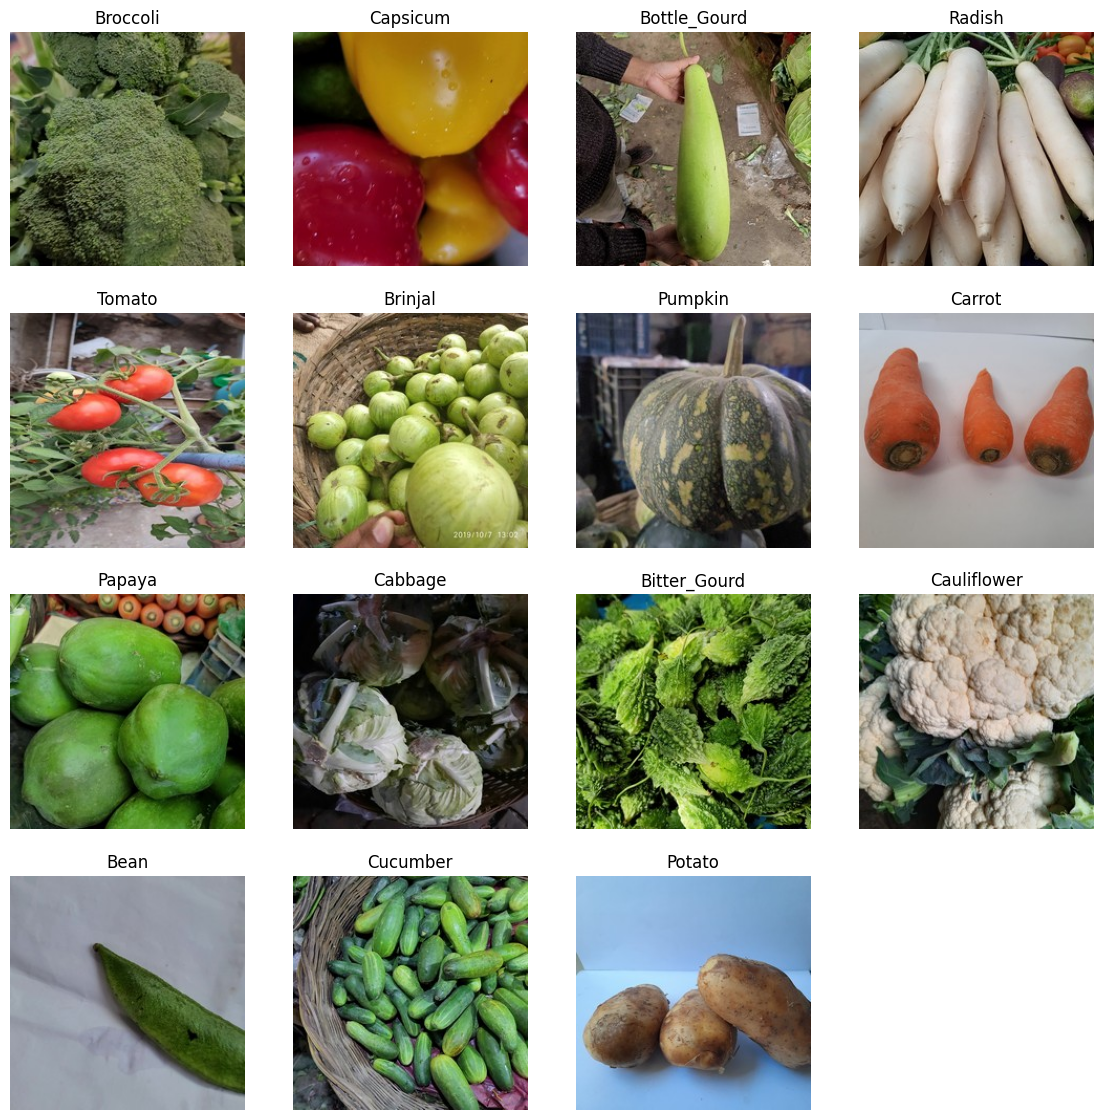

In [10]:
plot_images(image_classes)

## **Image Preprocessing**

In [16]:
image_generator = ImageDataGenerator(rescale = 1/255)

In [17]:
#apply generator on train data
train_data = image_generator.flow_from_directory(train_path,
                                                target_size = (150, 150),
                                                batch_size = 64,
                                                class_mode = 'categorical')

Found 15000 images belonging to 15 classes.


In [18]:
#apply generator on test data
test_data = image_generator.flow_from_directory(test_path,
                                                target_size = (150, 150),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 3000 images belonging to 15 classes.


In [19]:
#apply generator on test data
val_data = image_generator.flow_from_directory(validation_path,
                                                target_size = (150, 150),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 3000 images belonging to 15 classes.


## **Model Building**

In [23]:
model = Sequential()

#add convolutional layer + relu activation
model.add(Conv2D(filters = 32, kernel_size =  3, padding = 'same',
                activation = 'relu', input_shape = [150,150, 3]))

#add pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#add convolutional layer + relu activation
model.add(Conv2D(filters = 64, kernel_size =  3, padding = 'same',
                activation = 'relu'))

#add pooling layer
model.add(MaxPooling2D())

#add flatten layer
model.add(Flatten())

#fully connected layer
model.add(Dense(128, activation = 'relu'))

#output layer
model.add(Dense(15, activation = 'softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## **Model Compile & Fit**

In [24]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [25]:
model_history = model.fit(train_data,
                         epochs = 5,
                         validation_data = val_data)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/235 ━━━━━━━━━━━━━━━━━━━━ 43:09 11s/step - accuracy: 0.0938 - loss: 2.7213

I0000 00:00:1711101164.135203     126 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711101164.153827     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


235/235 ━━━━━━━━━━━━━━━━━━━━ 112s 430ms/step - accuracy: 0.3848 - loss: 2.2990 - val_accuracy: 0.8383 - val_loss: 0.5656
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 127ms/step - accuracy: 0.8803 - loss: 0.3972 - val_accuracy: 0.9003 - val_loss: 0.3249
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 131ms/step - accuracy: 0.9525 - loss: 0.1650 - val_accuracy: 0.9107 - val_loss: 0.3035
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 136ms/step - accuracy: 0.9782 - loss: 0.0826 - val_accuracy: 0.9273 - val_loss: 0.2619
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 136ms/step - accuracy: 0.9920 - loss: 0.0320 - val_accuracy: 0.9343 - val_loss: 0.2471


## **Model Performance Visualization**

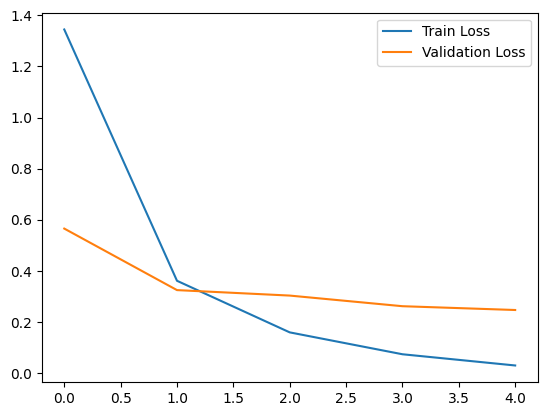

In [27]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

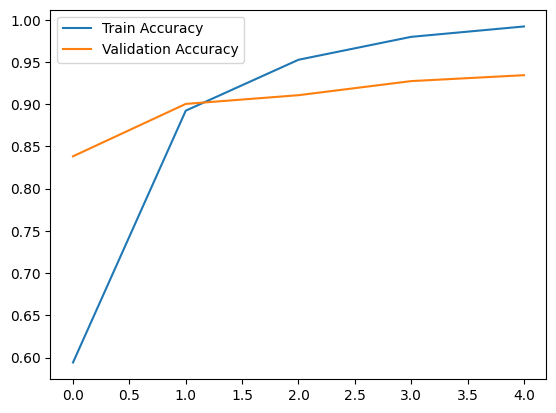

In [28]:
plt.plot(model_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

## **Model Evaluation**

In [30]:
model.evaluate(test_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 166ms/step - accuracy: 0.9307 - loss: 0.2682


[0.26442110538482666, 0.9316666722297668]

In [31]:
model.evaluate(train_data)

  3/235 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.9913 - loss: 0.0409  

W0000 00:00:1711101714.821644     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.9937 - loss: 0.0224


[0.020638464018702507, 0.9944000244140625]

## **Model Save**

In [32]:
#save model
model.save('model.h5')

In [33]:
#load model
from tensorflow.keras.models import load_model
model = load_model('model.h5')